In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Лабораторная работа №1
## Задание 2
### {Фамилия Имя}, {Номер группы}, Вариант {Номер варианта}, ({Дата})

### Задание

По данным выборки ($n=150$) требуется:
1. Составить вариационный ряд и список вариантов.
2. Составить ряд распределения частот вариационного ряда и построить полигон частот.
3. Составить ряд распределения относительных частот вариационного ряда и построить полигон относительных частот.
4. Составить эмпирическую функцию распределения и построить график эмпирической функции распределения.
5. Найти основные числовые характеристики вариационного ряда:
    - Выборочное среднее - $\overline x_в$
    - Выборочную дисперсию - $S^2$
    - Стандартное отклонение (Среднеквадратическое отклонение) - $S$
    - Коэффициент вариации - $CV$
6. Пояснить смысл полученных результатов

### Данные

In [26]:
lb_author = 'Фамилия, Имя'
lb_num = 1
lb_variant = 59
lb_exercise_num = 2
print(f'Фамилия, Имя: {lb_author}\nНомер лабораторной работы: {lb_num}\nВариант лабораторной работы: {lb_variant}\nНомер задания лабораторной работы: {lb_exercise_num}')

Фамилия, Имя: Фамилия, Имя
Номер лабораторной работы: 1
Вариант лабораторной работы: 59
Номер задания лабораторной работы: 2


In [ ]:
task = pd.read_json('input/Данные к заданию №2.json')
data = pd.Series(task['Данные'][lb_variant - 1])
print(data.tolist())

### Всего элементов ряда

In [ ]:
data_len = data.count()
print(f'Всего элементов ряда: {data_len}')

Всего элементов ряда: 150


## Пункт 1
**Составить вариационный ряд и список вариантов.**

### Вариационный ряд

In [29]:
data_sort = data.sort_values()
print(data_sort.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6]


### Варианты, $x_i$

In [30]:
unique = sorted(data.unique())
print(unique)

[0, 1, 2, 3, 4, 5, 6]


## Пункт 2
**Составить ряд распределения частот вариационного ряда и построить полигон частот.**

### Частота, $n_i$

In [31]:
freq = pd.Series(data_sort).value_counts().sort_index()
freq = pd.DataFrame(freq, index=unique, columns=["Частота"]).T
freq

,0,1,2,3,4,5,6
Частота,13,13,40,41,23,11,9


### Полигон частот вариационного ряда

In [32]:
fig = px.line(x=unique, y=freq.iloc[0], markers=True, title='Полигон частот вариационного ряда')
fig.show()

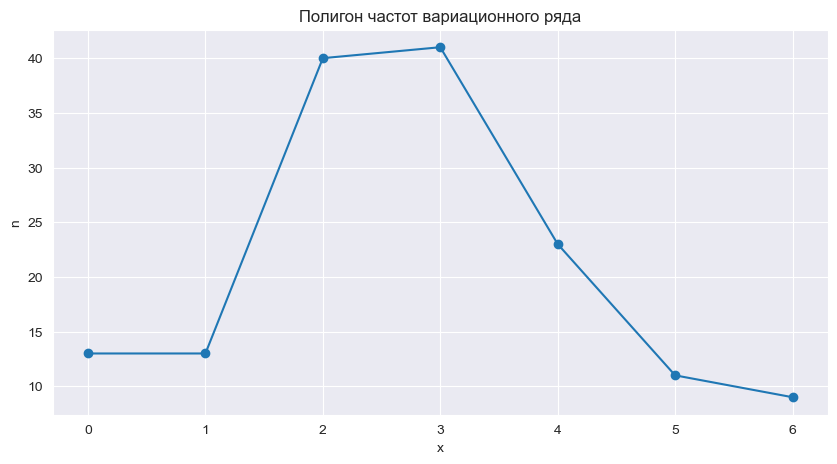

In [33]:
def plot_freq_polygon(x, y, title):
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title)
    ax.plot(x, y, marker='o')
    ax.set_xlabel("x")
    ax.set_ylabel("n")
    plt.plot()


plot_freq_polygon(x=unique, y=freq.iloc[0], title='Полигон частот вариационного ряда')

## Пункт 3
**Составить ряд распределения относительных частот вариационного ряда и построить полигон относительных частот.**

### Относительная частота, $w_i$

In [34]:
rel_freq = pd.Series(data_sort).value_counts().sort_index() / len(data_sort)
rel_freq = pd.DataFrame(rel_freq, index=unique, columns=["Относительная частота"]).T
rel_freq

,0,1,2,3,4,5,6
Относительная частота,0.086667,0.086667,0.266667,0.273333,0.153333,0.073333,0.06


### Полигон относительных частот вариационного ряда


In [35]:
fig = px.line(x=unique, y=rel_freq.iloc[0], markers=True, title='Полигон относительных частот вариационного ряда')
fig.show()

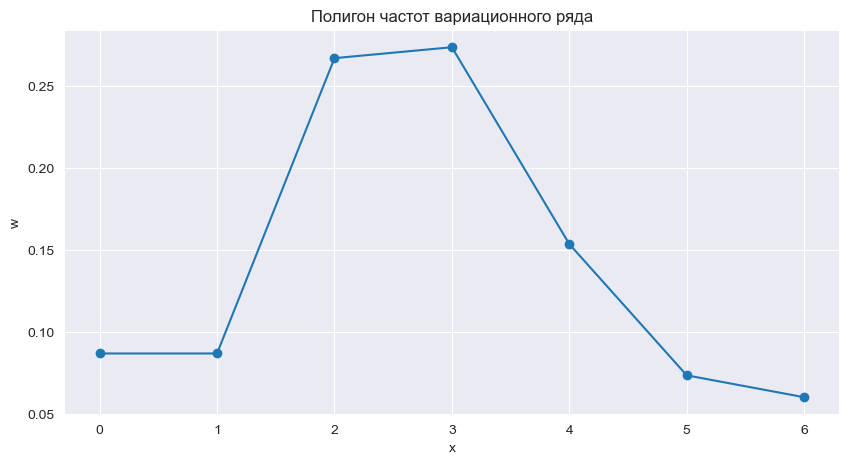

In [36]:
def plot_rel_freq_polygon(x, y, title):
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_title(title)
    ax.plot(x, y, marker='o')
    ax.set_xlabel("x")
    ax.set_ylabel("w")
    plt.plot()


plot_rel_freq_polygon(x=unique, y=rel_freq.iloc[0], title='Полигон частот вариационного ряда')

## Пункт 4
**Составить эмпирическую функцию распределения и построить график эмпирической функции распределения.**

### Эмпирическая функция распределения $F^*$

In [37]:
emp_func = rel_freq.iloc[0].cumsum()
emp_func.name = "F*"
emp_func = pd.DataFrame(emp_func, index=unique).T
emp_func

,0,1,2,3,4,5,6
F*,0.086667,0.173333,0.44,0.713333,0.866667,0.94,1.0


In [38]:
def emp_func_latex(emp_func):
    print(f'$$\nF^* (x) =\n\\begin{{cases}}')
    for i in range(len(emp_func.values.tolist()[0])):
        if i == 0:
            print(f'0, && x \le {unique[0]:.2f} \\\\')
        elif i == len(emp_func.values.tolist()[0]) - 1:
            print(f'{emp_func.values.tolist()[0][i - 1]:.2f}, && {unique[i - 1]:.2f} < x \le {unique[i]:.2f} \\\\')
            print(f'1.0, && x > {unique[i]:.2f} \\\\')
        else:
            print(f'{emp_func.values.tolist()[0][i - 1]:.2f}, && {unique[i - 1]:.2f} < x \le {unique[i]:.2f} \\\\')
    print('\\end{cases}\n$$')


emp_func_latex(emp_func)

$$
F^* (x) =
\begin{cases}
0, && x \le 0.00 \\
0.09, && 0.00 < x \le 1.00 \\
0.17, && 1.00 < x \le 2.00 \\
0.44, && 2.00 < x \le 3.00 \\
0.71, && 3.00 < x \le 4.00 \\
0.87, && 4.00 < x \le 5.00 \\
0.94, && 5.00 < x \le 6.00 \\
1.0, && x > 6.00 \\
\end{cases}
$$


$$
F^* (x) =
\begin{cases}
0, && x \le 0.00 \\
0.09, && 0.00 < x \le 1.00 \\
0.17, && 1.00 < x \le 2.00 \\
0.44, && 2.00 < x \le 3.00 \\
0.71, && 3.00 < x \le 4.00 \\
0.87, && 4.00 < x \le 5.00 \\
0.94, && 5.00 < x \le 6.00 \\
1.0, && x > 6.00 \\
\end{cases}
$$

### График эмпирической функции распределения

In [39]:
fig = px.ecdf(x=unique, y=emp_func.values.tolist()[0], markers=True, title='График эмпирической функции распределения')
fig.show()

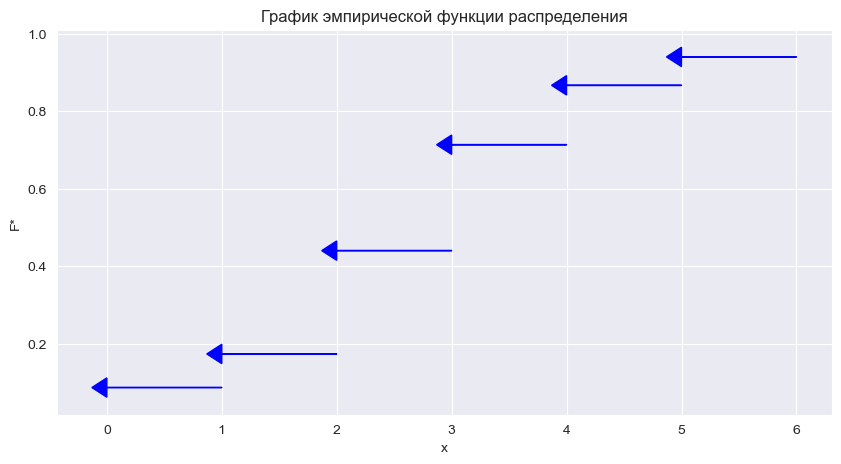

In [40]:
def plot_cdf_func(x, y, title, c=1):
    fig, ax = plt.subplots(figsize=(10, 5))
    min_y, max_y = min(y), max(y)
    arrow_length = ((max_y - min_y) / len(y)) * c
    for idx in range(len(y) - 1):
        dx = x[idx] - x[idx + 1]
        ax.arrow(x=x[idx + 1], y=y[idx], dx=dx, dy=0, color="blue", head_width=.05, head_length=arrow_length)
    ax.set_title(title)
    ax.set_ylabel("F*")
    ax.set_xlabel("x")
    plt.plot()


plot_cdf_func(unique, emp_func.iloc[0].tolist(), 'График эмпирической функции распределения')

## Пункт 5
**Найти основные числовые характеристики вариационного ряда**

### Выборочное среднее, $\overline x$

$$\overline x = \frac1n \sum^n_{i=1} x_i$$

In [41]:
mean = np.mean(data)
print(f'Выборочное среднее: {mean:.2f}')

Выборочное среднее: 2.78


### Выборочная дисперсия, $s^2_x$

$$s^2_x = \frac{1}{n-1}\sum^n_{i=1} (x_i - \overline x)^2$$

In [42]:
var = np.var(data, ddof=1)
print(f'Выборочная дисперсия: {var:.2f}')

Выборочная дисперсия: 2.35


### Стандартное отклонение (Среднеквадратическое отклонение), $s_x$

$$s_x = \sqrt{s^2}$$

In [43]:
std = np.std(data, ddof=1)
print(f'Среднеквадратическое отклонение: {std:.2f}')

Среднеквадратическое отклонение: 1.53


### Коэффицент вариации, $CV$

$$CV = \frac{s}{\overline x} \cdot 100$$

In [44]:
cv = (std / mean) * 100
cv

55.110547138126265

## Пункт 6
**Пояснить смысл полученных результатов.**

$$\overline x = 2.77$$
$$s^2_x = 2.28$$
$$s = 1.51$$
$$CV = 54.49$$

In [45]:
answer = pd.DataFrame()

answer['Фамилия, Имя'] = [lb_author]
answer['Номер лабораторной работы'] = [lb_num]
answer['Вариант лабораторной работы'] = [lb_variant]
answer['Номер задания лабораторной работы'] = [lb_exercise_num]

answer['Вариационный ряд'] = [str(data_sort.tolist())]
answer['Варианты'] = [str(unique)]
answer['Частота'] = [str(freq.values.tolist()[0])]
answer['Относительная частота'] = [str(rel_freq.values.tolist()[0])]
answer['Эмпирическая функция распределения'] = [str(emp_func.values.tolist()[0])]

answer['Выборочное среднее'] = [mean]
answer['Выборочная дисперсия'] = [var]
answer['Среднеквадратическое отклонение'] = [std]
answer['Коэффицент вариации'] = [cv]
answer.to_csv('output/ФамилияИмя_ЛБ1_Задание_2.csv', index=False)
answer

,"Фамилия, Имя",Номер лабораторной работы,Вариант лабораторной работы,Номер задания лабораторной работы,Вариационный ряд,Варианты,Частота,Относительная частота,Эмпирическая функция распределения,Выборочное среднее,Выборочная дисперсия,Среднеквадратическое отклонение,Коэффицент вариации
0,"Фамилия, Имя",1,59,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...","[0, 1, 2, 3, 4, 5, 6]","[13, 13, 40, 41, 23, 11, 9]","[0.08666666666666667, 0.08666666666666667, 0.2...","[0.08666666666666667, 0.17333333333333334, 0.4...",2.78,2.347248,1.532073,55.110547
